In [1]:
import urllib2
import json
import re
import io
import matplotlib.pyplot as plt
import networkx as nx
import numpy
from collections import Counter
from pathlib2 import Path
import math
import copy
import community
import nltk, re, pprint
import os
import sklearn

In [2]:
Graph = nx.Graph()
for filename in os.listdir('DoneMovies'):
    #print filename[:-4]
    test = io.open("DoneMovies/" + filename, 'r', encoding='utf-8')
    sidensJson = json.load(test)
    test.close()
    Graph.add_node(str(sidensJson["id"]))
    #break

In [3]:
len(Graph.nodes())

4398

In [4]:
for filename in os.listdir('ActorsMoreThan1'):
    test = io.open("ActorsMoreThan1/" + filename, 'r', encoding='utf-8')
    doneList = test.readlines()
    doneList = [x.strip() for x in doneList]
    test.close()
    for i in doneList:
        try:
            Graph.node[str(i)]
            for j in doneList:
                try:
                    Graph.node[str(j)]
                    if str(i) != str(j):
                        Graph.add_edge(str(i),str(j))
                except:
                    pass
        except:
            pass
    #break
for i in Graph.nodes():
    if Graph.degree(i) == 0:
        Graph.remove_node(i)
        #print i

In [5]:
len(Graph.nodes())

4359

In [28]:
len(Graph.edges())

269176

In [28]:
for i in Graph.nodes():
    if Graph.degree(i) == 0:
        #Graph.remove_node(i)
        print i

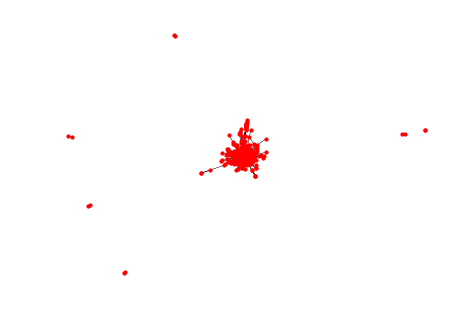

In [30]:
nx.draw(Graph, node_size = 10, width = 0.5)

plt.show()

In [7]:
test = Graph.degree().values()

In [8]:
test.count(6)

13

In [33]:
betweenCent = nx.betweenness_centrality(Graph)

In [34]:
type(betweenCent)

dict

In [36]:
from collections import Counter
peopleList = Counter(betweenCent).most_common(5)
for i in peopleList:
    print i

('10403', 0.005201383106532371)
('676', 0.004978885114488738)
('87818', 0.004830745370474916)
('12405', 0.0041272787544671275)
('12572', 0.0040546504281022975)


In [30]:
giant = max(nx.connected_component_subgraphs(Graph), key=len)
partition = community.best_partition(Graph)

C:\Users\masta\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\masta\Anaconda2\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:


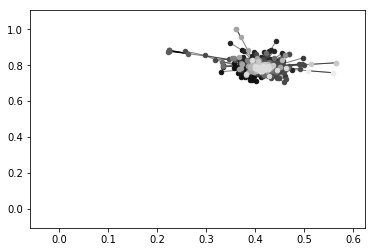

In [5]:
size = float(len(set(partition.values())))
pos = nx.spring_layout(Graph)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(Graph, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))
nx.draw_networkx_edges(Graph,pos, alpha=0.5)
plt.show()

In [31]:
Mod = community.modularity(partition, Graph)
print Mod

0.225738942766


In [26]:
communitiesNumber = max(partition.values())
print "Number of communities : ", communitiesNumber

Number of communities :  11


In [27]:
testList = partition.values()
for i in set(partition.values()):
    print testList.count(i)

1275
1009
944
897
9
44
47
117
3
3
4
5


In [24]:
testList = []
for i in set(partition.values()):
    testList.append([])
for node, part in partition.iteritems():
    testList[part].append(node)
    print node, part

13195 1
16072 0
55347 1
11542 2
11543 0
11541 1
11547 2
11544 0
11545 2
144336 3
69422 4
26579 3
69427 4
296360 1
69428 4
10890 0
10894 2
61178 0
22267 1
50646 5
50647 2
25066 0
249660 3
82990 5
6795 3
323272 3
31915 0
209451 0
69394 4
2310 1
5857 3
5851 0
5852 3
17654 1
272 1
274 0
275 3
277 1
278 7
279 0
80591 1
17258 0
2108 0
26390 0
246403 2
10708 2
63020 0
9529 0
9257 3
9255 0
10707 3
9522 2
1370 0
100 1
106 0
107 1
105 0
15797 0
146304 2
146301 5
21291 0
15138 0
21294 0
14444 2
210577 3
85435 1
152601 2
20526 3
133694 3
10386 2
10385 2
10384 0
37799 3
10388 0
335984 3
7516 3
3512 0
335988 2
269149 2
12233 0
2687 0
12238 0
19158 0
14623 1
14628 0
98 1
9746 1
10560 3
157386 3
9741 0
10564 3
90 0
95 0
9749 0
97 3
96 0
24150 0
24153 0
348 1
13059 3
8839 2
8835 2
8834 1
13051 3
13056 1
33676 0
33851 1
132344 0
77930 3
264999 3
27578 0
27579 1
87101 3
27573 2
27576 3
68351 3
243940 3
347026 1
1018 0
109445 2
109443 2
315837 1
242095 0
11169 3
14405 2
8764 1
34376 0
8766 0
688 0
1573 0


5825 0
273248 0
11260 2
73499 3
12159 0
9932 0
117553 0
39002 0
51162 2
23963 0
25748 0
27274 0
86829 3
49519 6
199 0
43593 0
49049 1
46094 0
49047 1
197 1
196 0
86825 1
81836 1
49040 3
192 1
74534 1
118340 1
11442 2
11448 0
57201 1
12795 3
3580 3
10333 0
10330 0
2768 0
10336 2
10337 0
3586 7
293768 3
16406 2
9489 2
9488 0
52520 1
9481 2
9480 3
9487 2
17134 3
301365 7
12241 0
12244 1
6279 0
6278 1
4421 0
13335 2
9559 0
9558 0
227719 3
20829 2
122917 1
9557 0
9556 1
9731 0
9730 0
13537 2
9737 0
9739 0
9738 3
242 0
24126 0
24128 3
175541 7
854 2
855 1
856 0
32007 7
853 1
102780 1
858 0
859 7
22972 1
10585 0
41513 2
27873 2
41515 2
2277 0
44010 3
252680 3
463317 1
14144 0
8408 0
8409 3
11861 0
11863 0
37094 0
11864 3
102651 1
84305 3
109439 2
15144 0
109431 2
291328 0
14369 2
14499 1
28448 0
14361 0
14362 0
78146 0
388399 3
76494 2
76493 2
76492 2
78149 0
1694 0
1690 3
1691 3
273477 2
34016 2
44943 3
44945 3
50318 1
222899 2
32856 2
23023 2
272878 3
23759 1
199933 0
13938 0
13937 0
497 0


9414 1
9430 2
44048 3
10637 3
12120 0
12123 7
10634 2
10632 0
11618 2
11619 1
10140 1
10142 0
10145 5
39691 2
10147 2
10149 7
9614 2
11940 1
9638 0
106135 3
9631 0
9320 1
9326 0
9327 2
9637 2
8944 0
2832 0
41233 2
152737 1
41733 2
53287 0
26978 0
33217 2
9618 0
9619 0
49948 0
10093 3
10092 2
1621 0
10090 2
1995 1
10096 2
1997 1
1996 1
353070 7
321741 3
59859 2
559 3
558 3
29963 1
557 3
550 1
24238 1
15668 0
59108 2
14248 2
37950 3
14396 2
14397 0
37958 1
399170 3
395834 3
6977 3
6972 1
6973 3
12498 0
13944 3
13945 0
4257 2
4256 2
271718 2
47502 2
313369 3
8386 2
219210 9
47327 6
6575 2
24418 5
4380 3
1371 0
73723 2
1372 1
1375 0
1374 0
401 3
400 0
25941 1
1378 7
409 1
28211 5
314385 1
23478 3
45269 1
11375 3
11377 1
11371 0
11370 1
379 0
378 6
7520 0
985 0
32823 2
377 0
32316 2
266294 2
16668 2
44877 2
214086 0
69497 4
10972 3
257088 1
150540 2
64849 0
244786 3
244783 3
339984 3
339988 0
5548 0
2275 0
26142 3
2270 1
26149 7
11595 0
11596 0
11592 0
82525 3
2454 1
96721 1
2453 0
14438 3


16888 2
17207 0
18239 3
65759 1
65754 1
27323 0
24929 0
84336 1
43919 0
24924 0
2360 1
139293 11
10952 0
1865 1
409502 3
16281 0
14527 3
36094 0
17689 0
13597 1
13596 2
285 1
41843 5
2109 0
10476 3
97614 3
2103 3
2100 3
2105 2
2639 0
10003 1
2637 3
2636 0
14012 3
20794 0
9599 0
9598 1
38731 0
9595 0
9594 0
9593 0
172040 2
295693 2
10488 1
10489 0
36419 2
84175 3
84174 2
10483 3
346672 1
10263 3
10269 0
70981 1
146198 3
180863 1
34813 3
9042 1
48289 1
9044 1
36677 0
36670 1
336004 0
210837 1
41446 2
44638 1
44639 1
44634 2
251321 1
44147 1
18206 2
768 1
769 0
763 1
345920 1
10288 3
767 1
764 0
765 0
167810 1
71859 1
6877 2
15764 1
158852 2
122081 2
157336 3
40820 0
5375 2
157099 3
8224 6
679 0
674 1
675 1
676 0
77987 3
672 1
673 1
3131 1
18009 1
3132 1
291270 1
31662 3
20200 0
31668 1
36647 0
11347 1
283552 1
157547 0
284276 3
188207 1
51515 0
345938 3
243938 2
15186 1
15189 2
23172 2
23174 1
1523 7
82390 3
1259 1
22556 3
12444 1
26428 1
49022 2
30973 1
177572 2
24684 1
2978 0
11774 2
2

In [25]:
M = 0.0
for i in testList:
    Lc = 0.0
    L = len(Graph.edges())
    Kc = 0.0
    for j in i:
        Kc = Kc + Graph.degree(j)
        for l in Graph[j].keys():
            if l in i:
                Lc = Lc + 1        
    print "Lc =", Lc, ",", "L =", L, "Kc =", Kc
    tempM = ((Lc / L) - (Kc/(2*L))**2)
    M = M + tempM
    print "M =", tempM
print "Sum Modularity for all the branches :", M

Lc = 69766.0 , L = 269176 Kc = 142585.0
M = 0.189035626909
Lc = 60446.0 , L = 269176 Kc = 119598.0
M = 0.17520621249
Lc = 62144.0 , L = 269176 Kc = 130015.0
M = 0.172542602081
Lc = 43570.0 , L = 269176 Kc = 114541.0
M = 0.116596567795
Lc = 58.0 , L = 269176 Kc = 59.0
M = 0.000215460393888
Lc = 1002.0 , L = 269176 Kc = 6014.0
M = 0.00359767740468
Lc = 2082.0 , L = 269176 Kc = 8065.0
M = 0.0075102888142
Lc = 4292.0 , L = 269176 Kc = 17435.0
M = 0.0148961131158
Lc = 6.0 , L = 269176 Kc = 7.0
M = 2.22900796904e-05
Lc = 6.0 , L = 269176 Kc = 7.0
M = 2.22900796904e-05
Lc = 8.0 , L = 269176 Kc = 9.0
M = 2.97200521979e-05
Lc = 10.0 , L = 269176 Kc = 15.0
M = 3.71496382624e-05
Sum Modularity for all the branches : 0.679711998853


In [22]:
partition

{'13195': 1,
 '16072': 0,
 '55347': 1,
 '11542': 2,
 '11543': 0,
 '11541': 0,
 '11547': 2,
 '11544': 0,
 '11545': 2,
 '144336': 3,
 '69422': 4,
 '26579': 3,
 '69427': 4,
 '296360': 1,
 '69428': 4,
 '10890': 0,
 '10894': 2,
 '61178': 0,
 '22267': 1,
 '50646': 5,
 '50647': 2,
 '25066': 0,
 '340101': 1,
 '82990': 6,
 '6795': 3,
 '323272': 3,
 '31915': 0,
 '209451': 0,
 '69394': 4,
 '2310': 1,
 '5857': 3,
 '5851': 0,
 '5852': 3,
 '17654': 1,
 '272': 1,
 '274': 0,
 '275': 3,
 '277': 1,
 '278': 5,
 '279': 0,
 '80591': 1,
 '17258': 0,
 '26390': 3,
 '246403': 1,
 '10708': 2,
 '63020': 0,
 '9529': 0,
 '9257': 10,
 '9255': 0,
 '10707': 3,
 '9522': 2,
 '1370': 0,
 '100': 1,
 '106': 0,
 '21610': 0,
 '21612': 0,
 '15797': 0,
 '146304': 2,
 '146301': 5,
 '39538': 7,
 '21291': 0,
 '15138': 0,
 '21294': 0,
 '54022': 0,
 '210577': 2,
 '85435': 2,
 '152601': 2,
 '20526': 1,
 '133694': 7,
 '10386': 2,
 '10385': 2,
 '10384': 0,
 '37799': 3,
 '10388': 2,
 '68179': 2,
 '345': 5,
 '3512': 0,
 '335988': 8,
 '